In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2020-08-24 04:00:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.3.208, 172.217.14.208, 172.217.14.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.3.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   132MB/s    in 0.5s    

2020-08-24 04:00:20 (132 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
!unzip -qq cats_and_dogs_filtered.zip 

replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
from tensorflow import keras
import os, sys

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd
from matplotlib import pyplot

In [6]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.show()
    pyplot.close()


In [35]:
# run the test harness for evaluating a model
def run_test_harness(model):
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('cats_and_dogs_filtered/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('cats_and_dogs_filtered/validation/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # Create EarlyStopping callback which stopps after 5 epochs of non-increasing accuracy
    early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=10, callbacks=[early])
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it))
    print('Test Accuracy > %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)


## Create 5 models with 1/2/3/4/5 VGG block(s)

In [22]:
# define a cnn model with one VGG block
def define_one_block_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model


In [23]:
# define a cnn model with two VGG blocks
def define_two_blocks_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model


In [24]:
# define a cnn model with three VGG blocks
def define_three_blocks_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model


In [32]:
# define a cnn model with four VGG blocks
def define_four_blocks_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model


In [33]:
# define a cnn model with five VGG blocks
def define_five_blocks_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

## Evaluate five baseline models

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 640000)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               81920128  
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 81,922,049
Trainable params: 81,922,049
Non-trainable params: 0
_________________________________________________________________
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
32/32 [=====

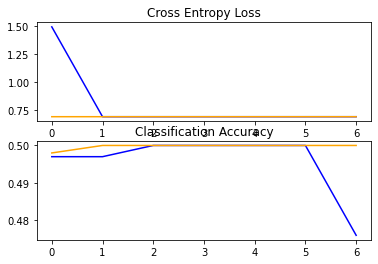

In [36]:
model1 = define_one_block_model()
run_test_harness(model1)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               40960128  
_________________________________________________________________
dense_19 (Dense)             (None, 1)               

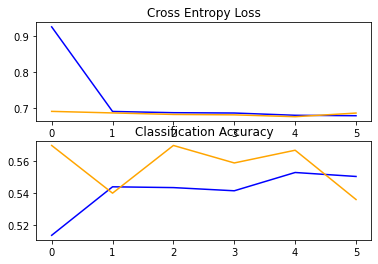

In [37]:
model2 = define_two_blocks_model()
run_test_harness(model2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 50, 50, 256)       295168    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 25, 25, 256)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 160000)          

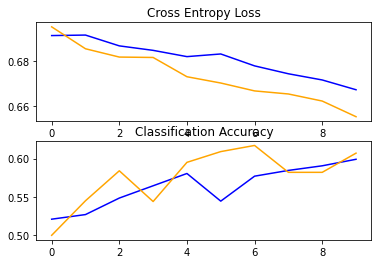

In [38]:
model3 = define_three_blocks_model()
run_test_harness(model3)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 50, 50, 256)       295168    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 25, 25, 256)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 25, 25, 512)     

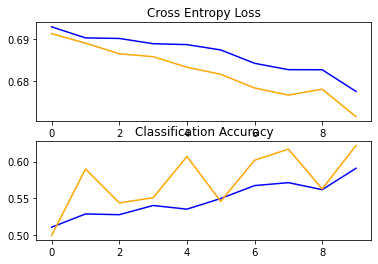

In [39]:
model4 = define_four_blocks_model()
run_test_harness(model4)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 50, 50, 256)       295168    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 25, 25, 256)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 25, 25, 512)     

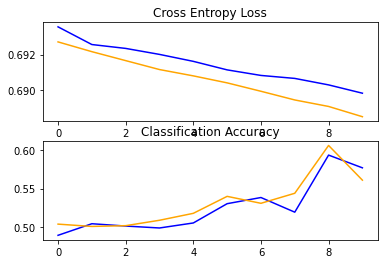

In [40]:
model5 = define_five_blocks_model()
run_test_harness(model5)

In [61]:
# define a cnn model with four VGG blocks with addition 2 conv2d layers in first two VGG blocks
def define_four_blocks_model_opt1():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 100, 100, 128)     147584    
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 50, 50, 256)     

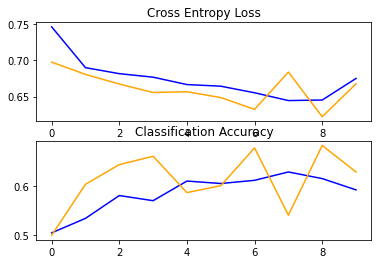

In [62]:
model6 = define_four_blocks_model_opt1()
run_test_harness(model6)

In [63]:
# define a cnn model with four VGG blocks and 2 conv2d in each block
def define_four_blocks_model_double_conv2d():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 100, 100, 128)     147584    
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 50, 50, 256)     

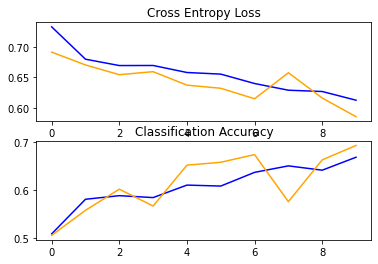

In [64]:
model7 = define_four_blocks_model_double_conv2d()
run_test_harness(model7)